# RumEval19 Twitter data

Explore word distributions and dynamics.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import pickle as pc
import dateutil.parser
from glob import glob
import json
import codecs

# Tokenizer
from nltk.tokenize.api import StringTokenizer
from nltk.tokenize import TweetTokenizer

# Text representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualizers
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Set properties
lW = 5
fS = 25
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

font = {'weight' : 'normal', 'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
# Load data

# Load numpy array
# wemb = np.load('rumeval19.npy')

# Load frame
data = pd.read_json('./RumEval19.json')

In [4]:
data

,date,datetime,id,label,reply_ix,rumour,text,thread_ix
0,2015-01-07,2015-01-07 11:28:49,552788945017516032,support,0,charliehebdo,Appalled by the attack on Charlie Hebdo in Par...,0
1,2015-01-07,2015-01-07 12:01:13,552797099138748416,query,1,charliehebdo,@katherine1924 @Mumbobee @tnewtondunn @mehdirh...,0
10,2015-01-07,2015-01-07 11:51:16,552794594115870720,comment,10,charliehebdo,@Mumbobee @tnewtondunn @mehdirhasan if free s...,0
100,2015-01-08,2015-01-08 00:42:40,552988724288827392,support,3,charliehebdo,"+1 | @tmpear : ""Most compelling image I've see...",6
1000,2015-01-07,2015-01-07 15:38:50,552851863671169024,comment,11,charliehebdo,@RT_com bastards,65
1001,2015-01-07,2015-01-07 14:32:56,552835278625177600,comment,12,charliehebdo,@ThePeopleRise @RT_com Islam does not condone ...,65
1002,2015-01-07,2015-01-07 14:27:57,552834026948415488,comment,13,charliehebdo,"@RT_com not men, not human, these are Zealots,...",65
1003,2015-01-07,2015-01-07 14:43:54,552838040503472128,comment,14,charliehebdo,@RT_com this is mossad,65
1004,2015-01-07,2015-01-07 14:36:50,552836259283218432,comment,15,charliehebdo,@RT_com All in the name of oil.,65
1005,2015-01-07,2015-01-07 15:00:17,552842163160367104,comment,16,charliehebdo,@RT_com just my 2 cents but URGENT is really n...,65


In [5]:
# Generate (tf-idf) count for each tweet
tweets = data['text'].values
tW = TweetTokenizer(strip_handles=True).tokenize
tV = CountVectorizer(stop_words='english', analyzer='word', tokenizer=tW, strip_accents='unicode', lowercase=True)

T = np.array(tV.fit_transform(tweets).todense())
F = np.array(tV.get_feature_names())

## Top-K words overall

In [6]:
# Take sum of words
sT = np.sum(T, axis=0)

# Sort sum
ix = np.argsort(sT)
sT = sT[ix]
sF = F[ix]

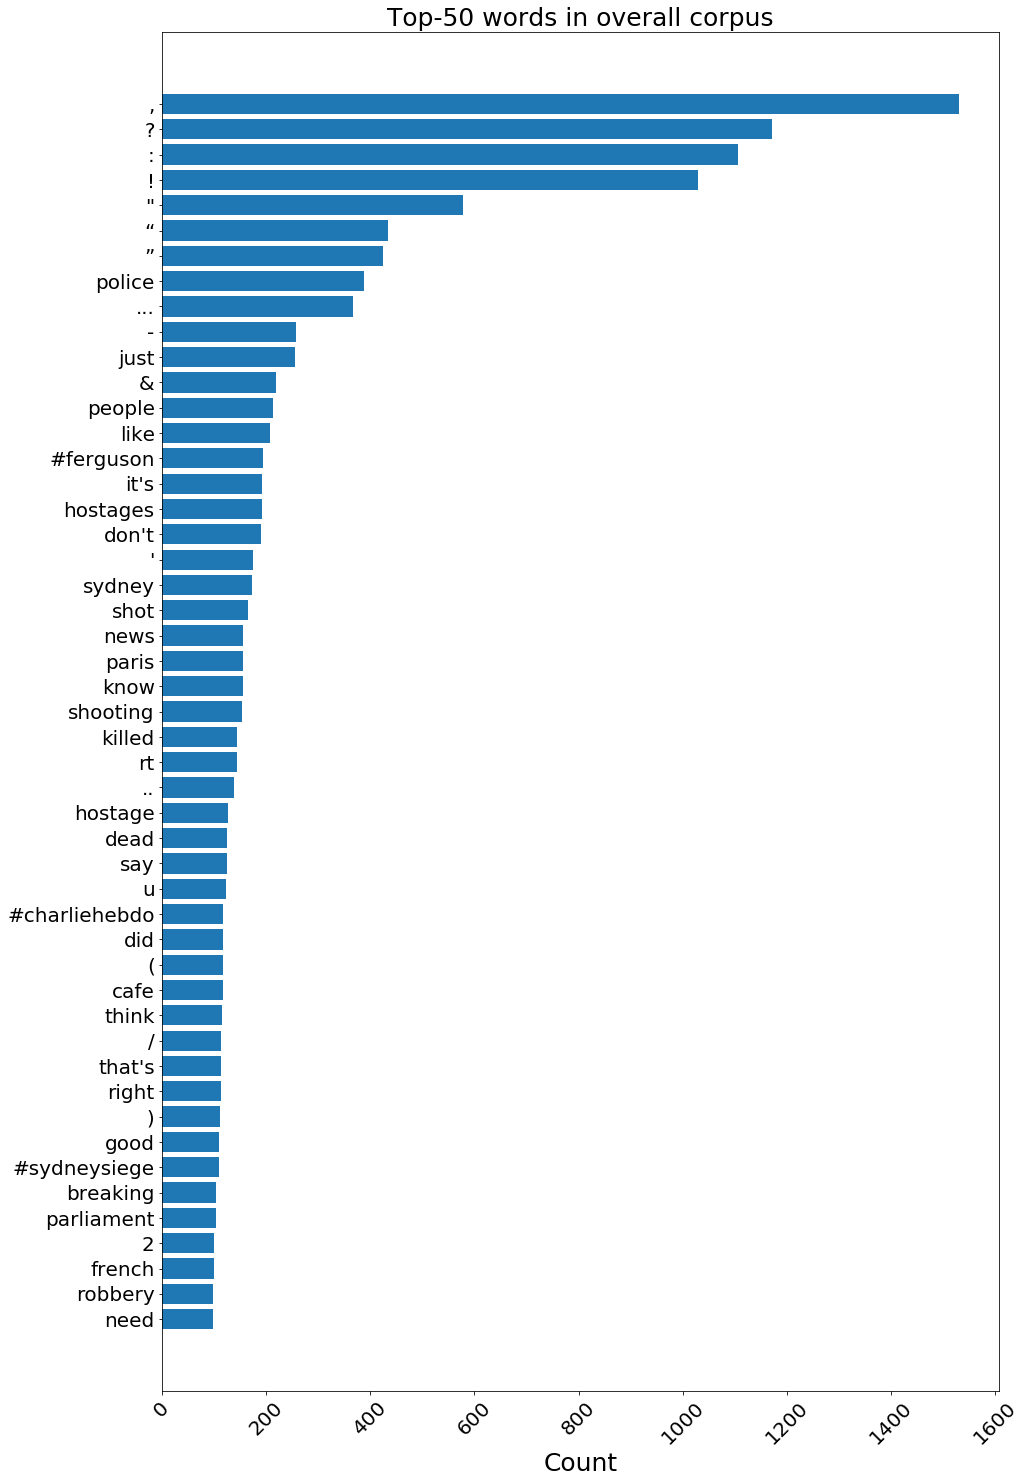

In [7]:
# Visualize word count
K = 50
topk = slice(-K,-1)

fig = plt.figure(figsize=(15,K/2.))

plt.barh(sF[topk], sT[topk])

plt.xticks(rotation=45)
plt.xlabel('Count', fontsize=fS)
# plt.ylabel('Words', fontsize=fS)
plt.title('Top-' + str(K) + ' words in overall corpus', fontsize=fS);

fig.savefig('viz/top' + str(K) + '_overall.png', bbox_inches='tight', padding=0.0)

## Top-K words per rumour

In [8]:
# rum_ix = (data['rumour'] == rumour).values

# # Take sum of words
# sT = np.sum(T[rum_ix, :], axis=0)

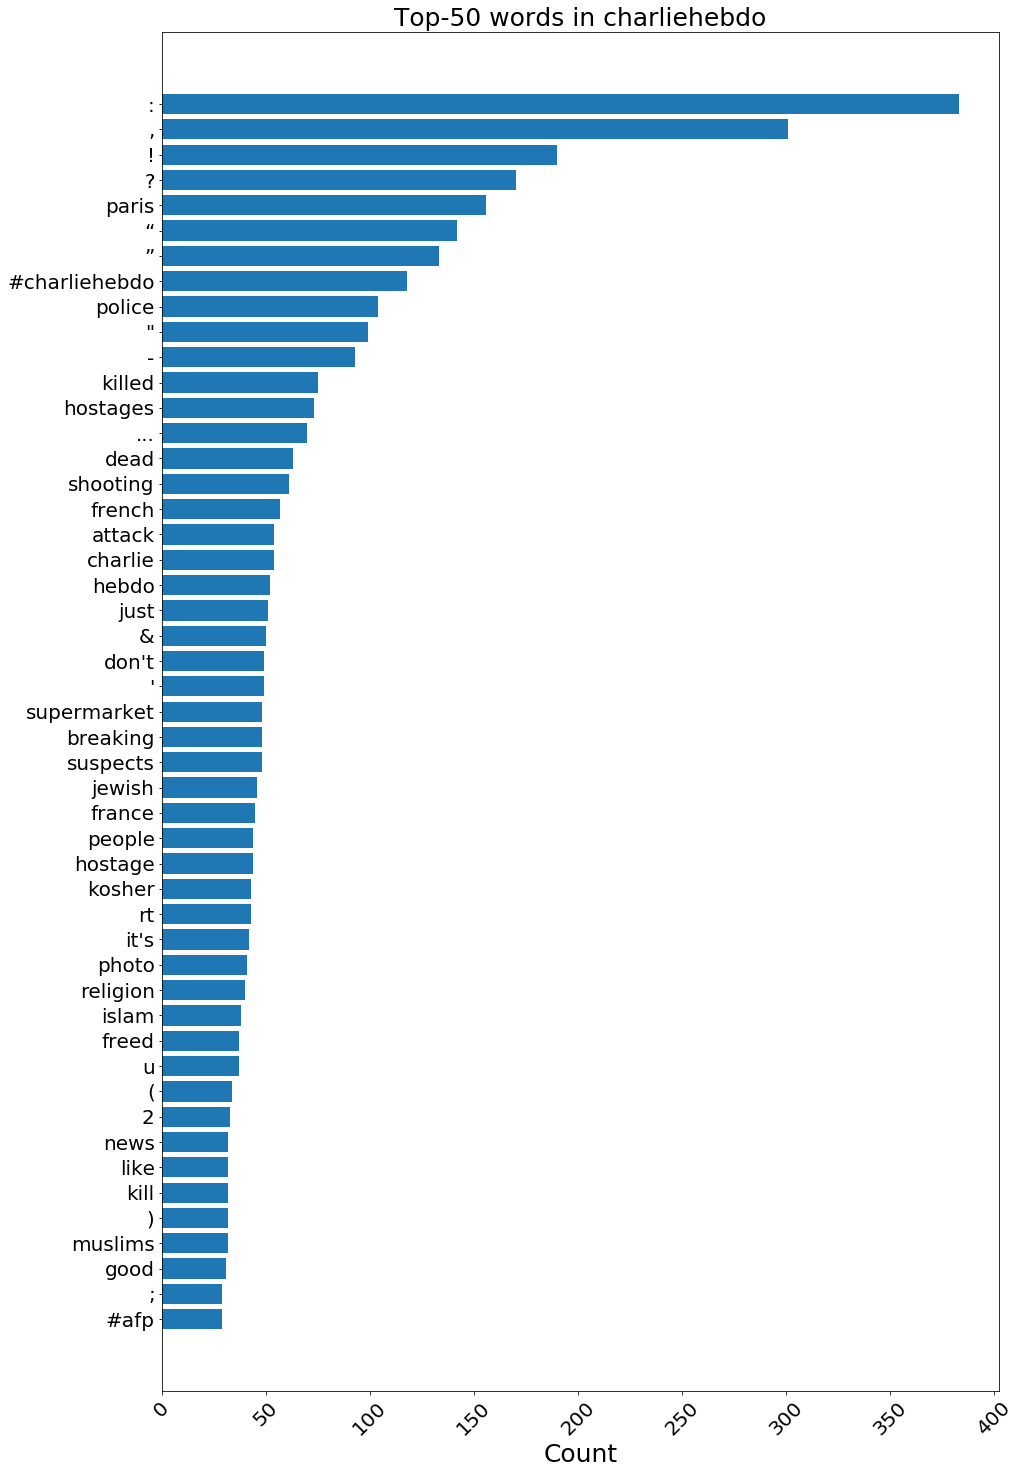

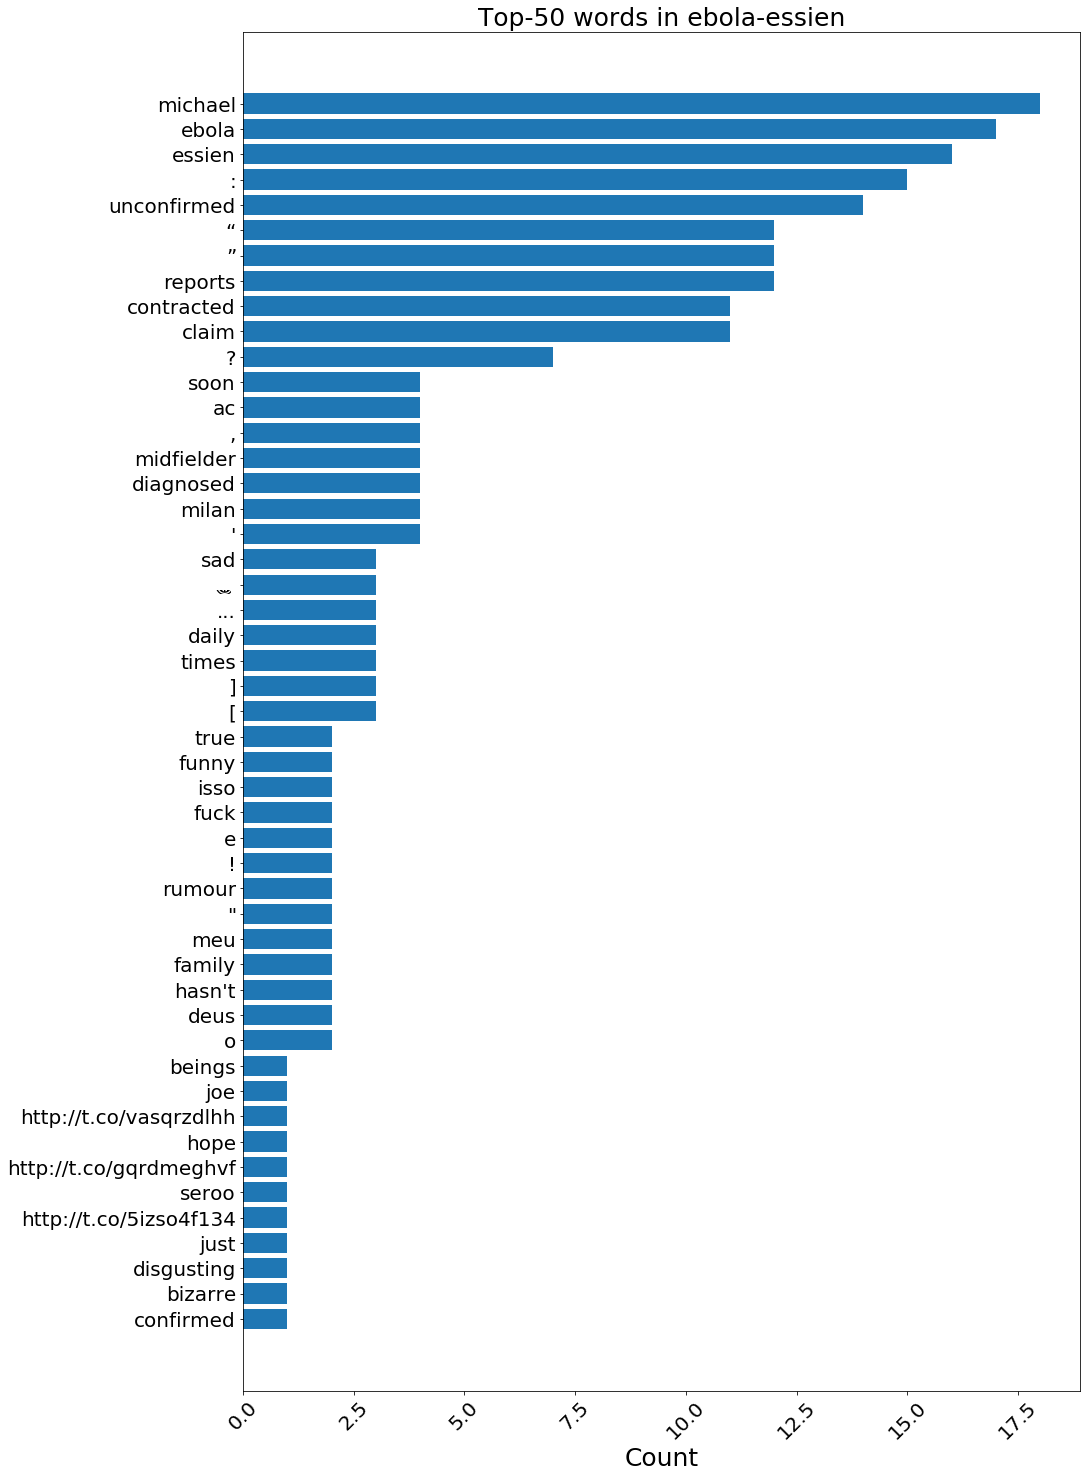

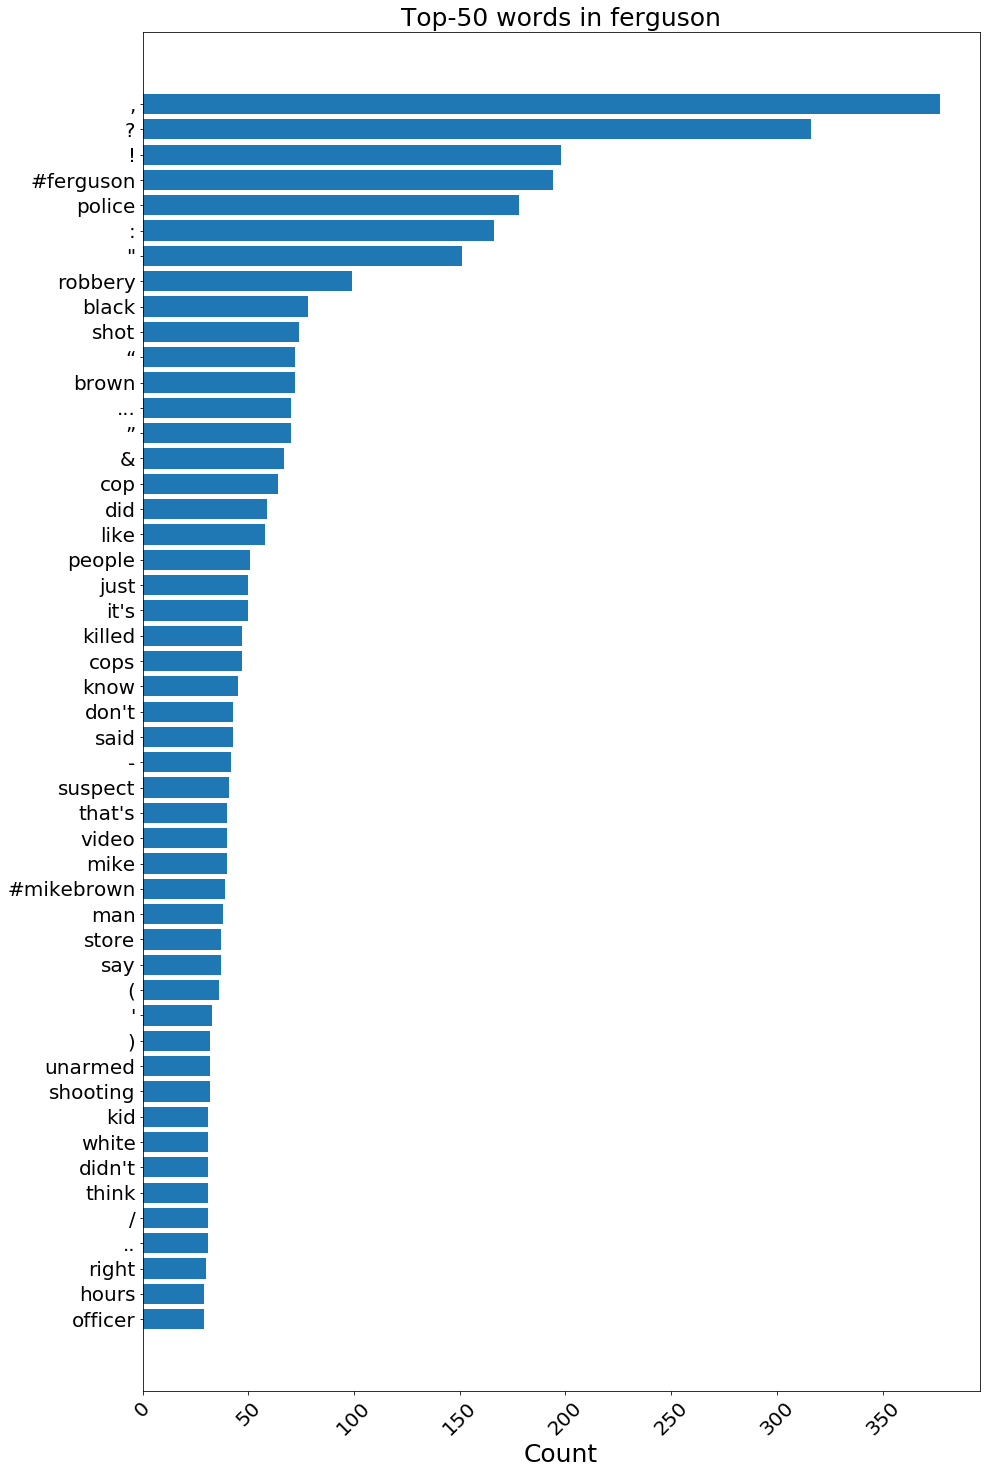

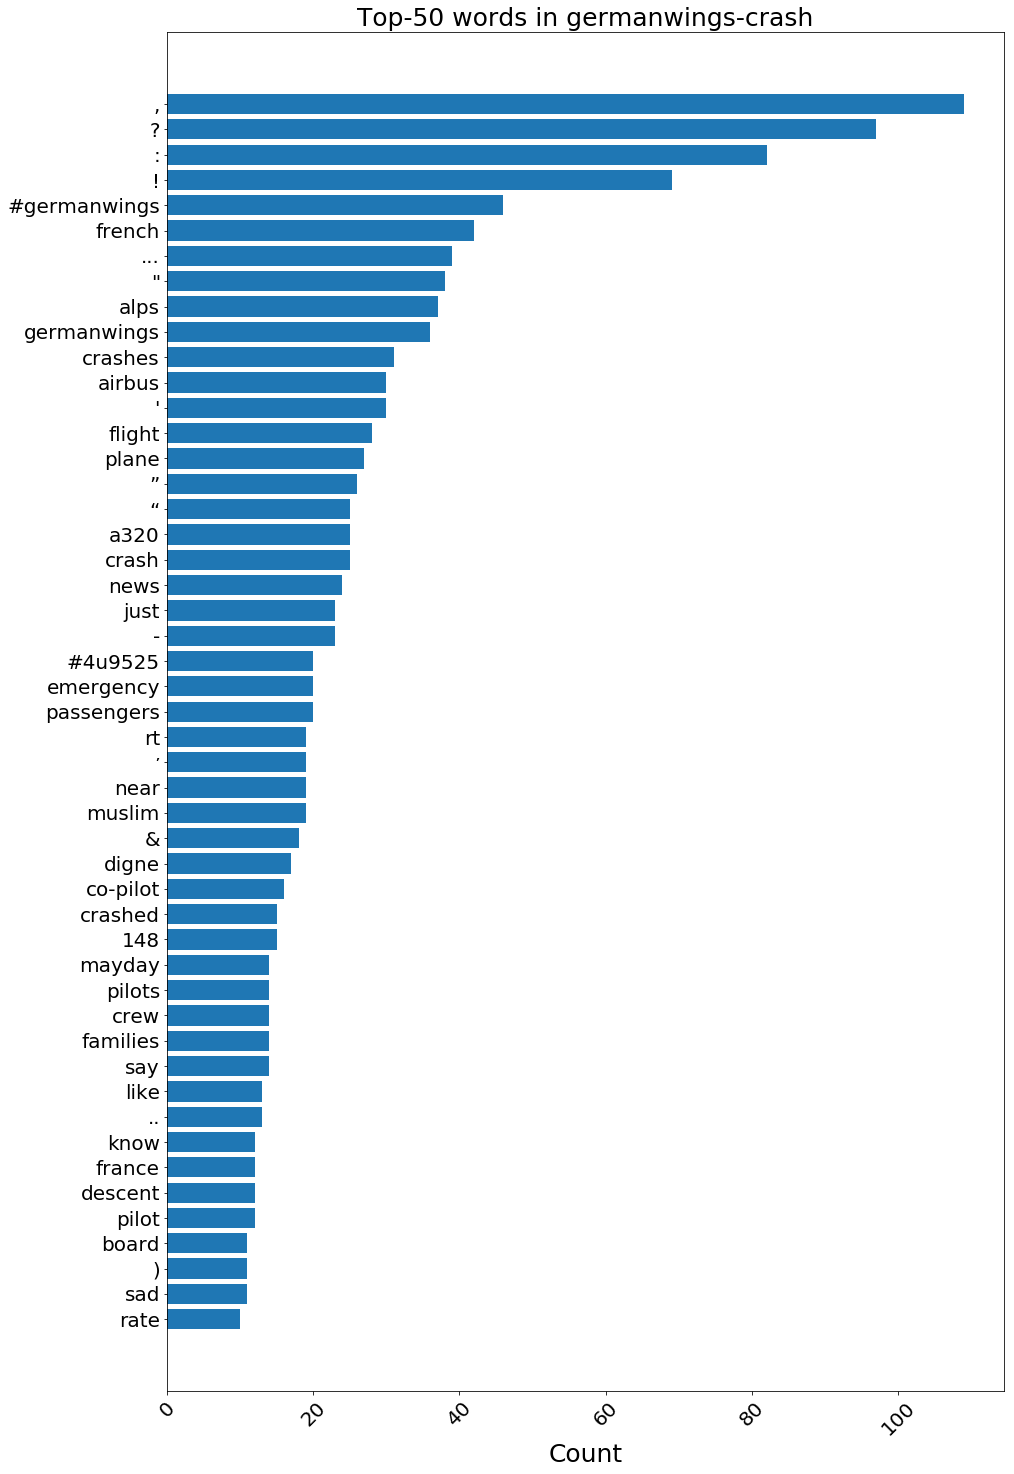

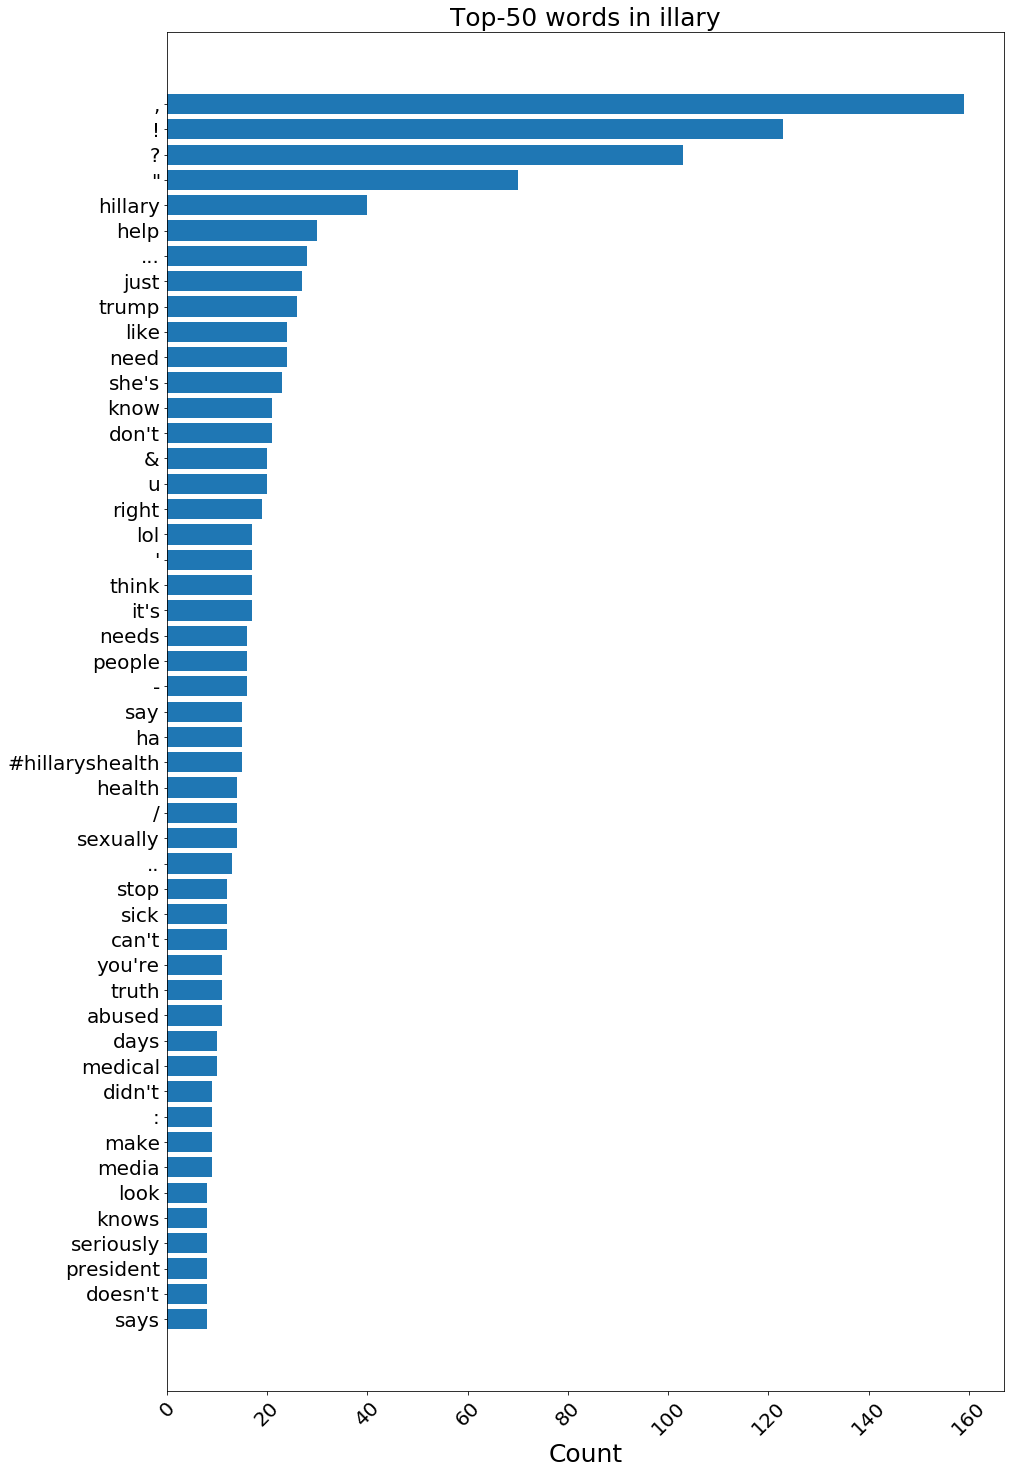

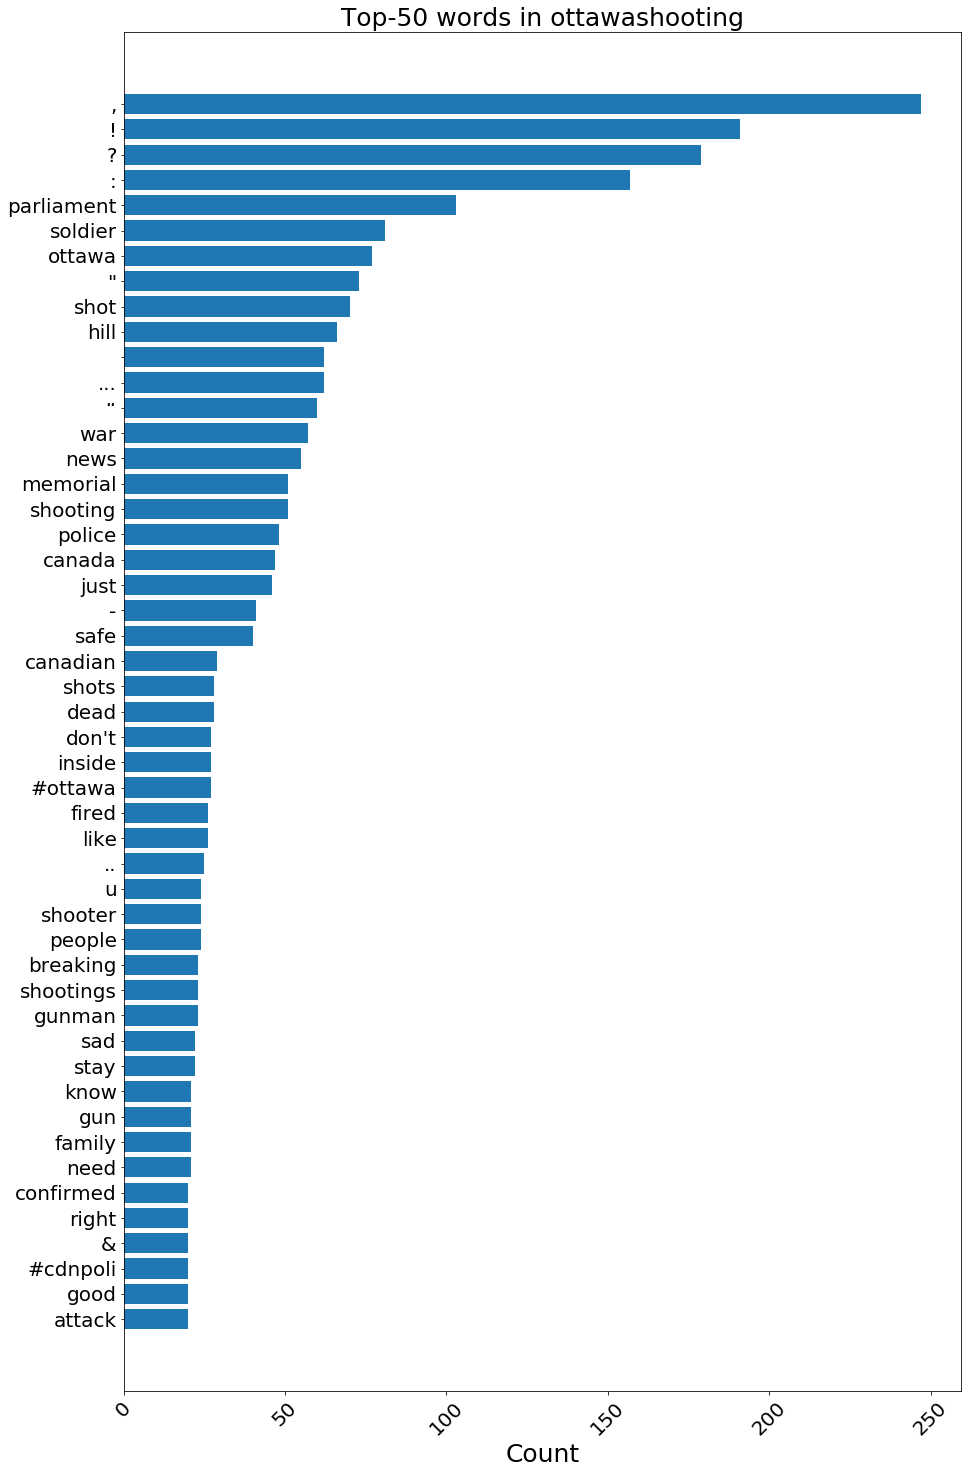

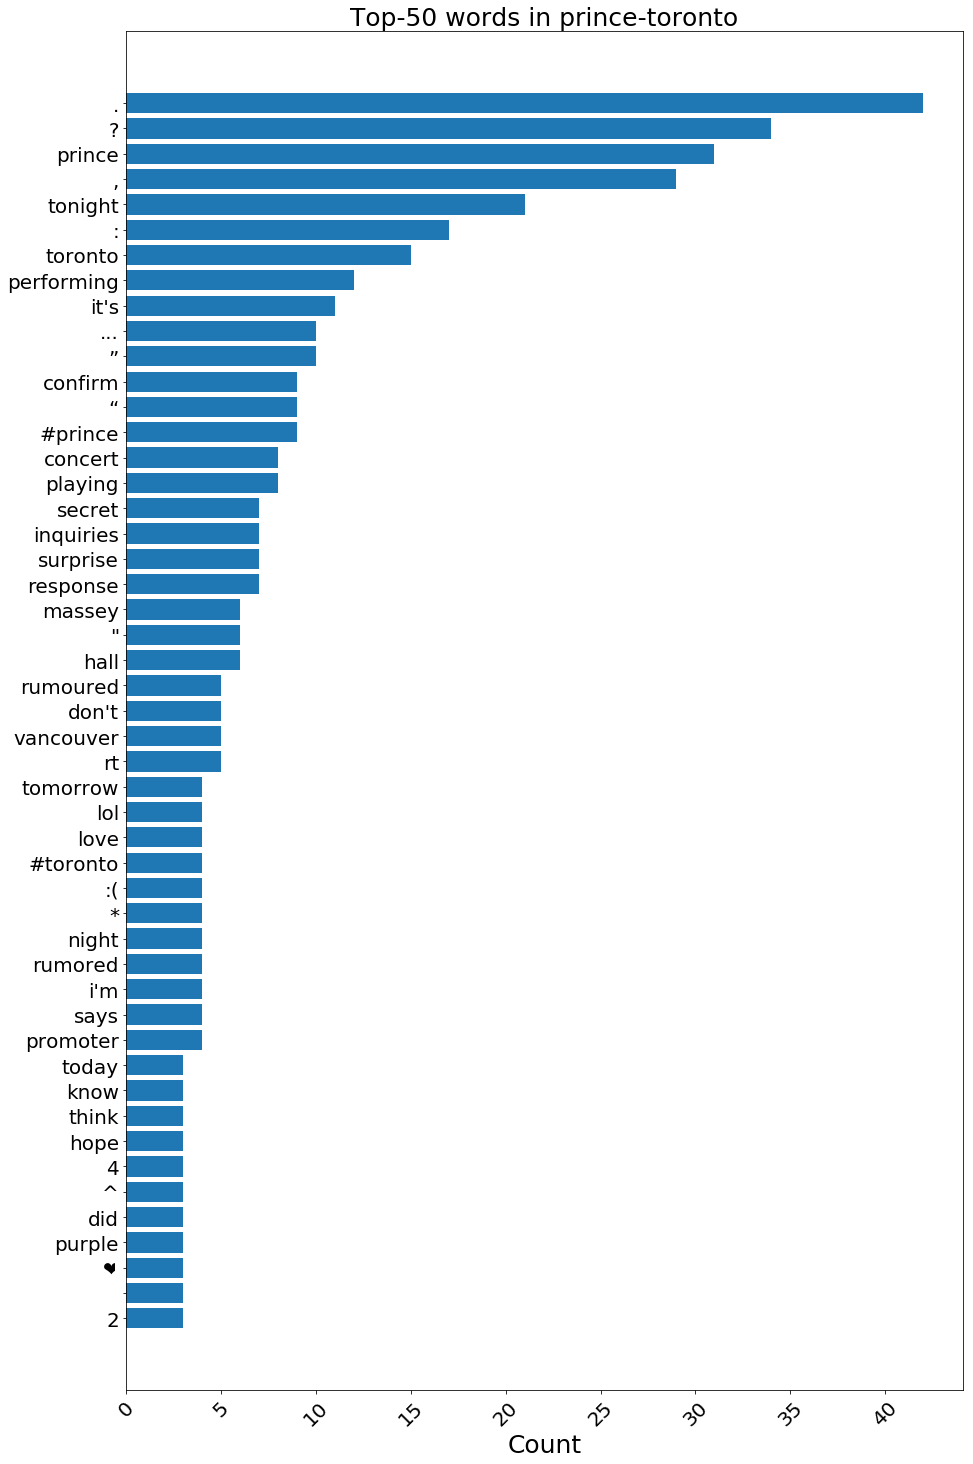

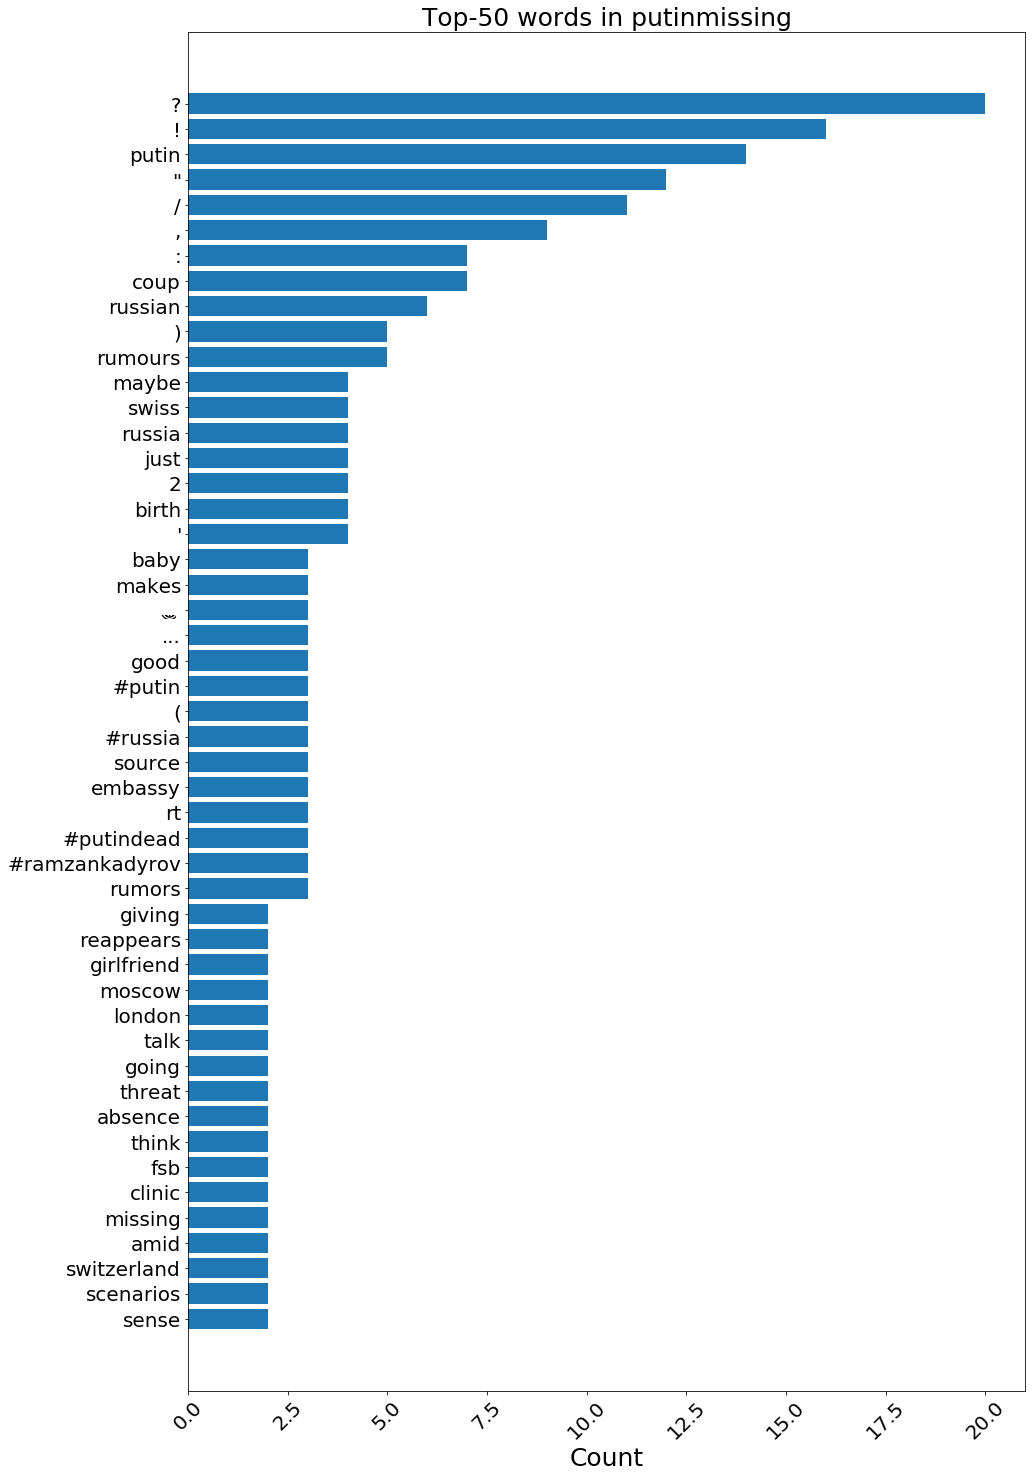

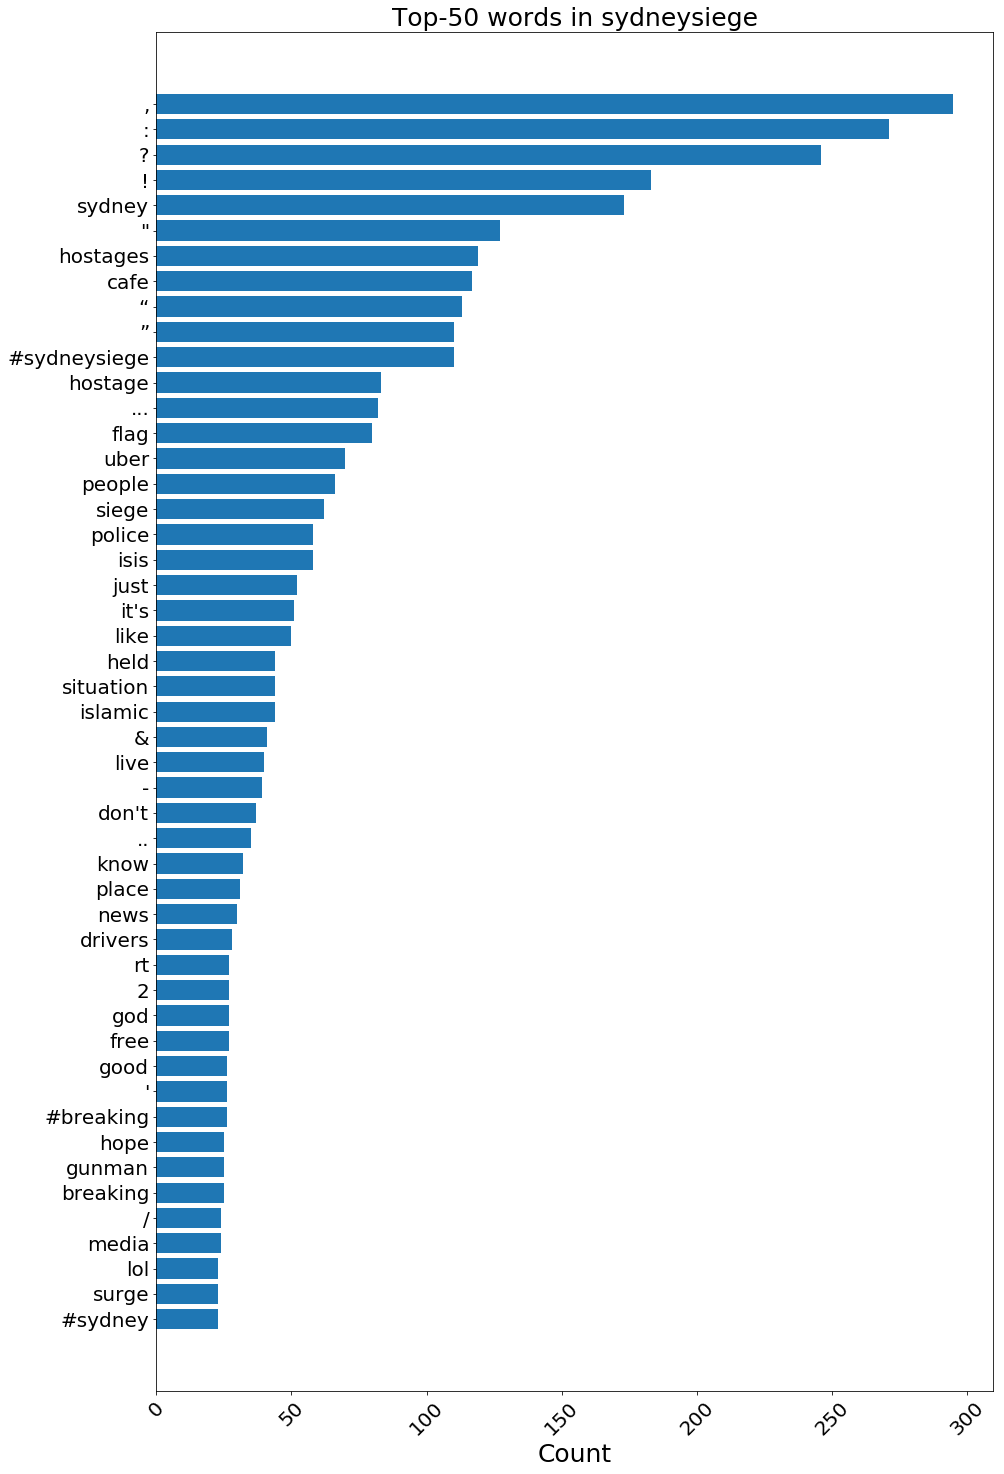

In [9]:
# Identify set of rumours
rumours = np.unique(data['rumour'].values)

# Top-k words to show
K = 50
topk = slice(-K,-1)

# Loop over rumours
for r, rumour in enumerate(rumours):
    
    # Rumour index
    rum_ix = (data['rumour'] == rumour).values

    # Take sum of words
    sT = np.sum(T[rum_ix, :], axis=0)

    # Sort sum
    ix = np.argsort(sT)
    sT = sT[ix]
    sF = F[ix]
    
    fig = plt.figure(figsize=(15,K/2.))

    plt.barh(sF[topk], sT[topk])

    plt.xticks(rotation=45)
    plt.xlabel('Count', fontsize=fS)
    # plt.ylabel('Words', fontsize=fS)
    plt.title('Top-' + str(K) + ' words in ' + rumour, fontsize=fS);

    fig.savefig('viz/top' + str(K) + '_' + rumour + '.png', bbox_inches='tight', padding=0.0)
    

## Word usage dynamics over rumours

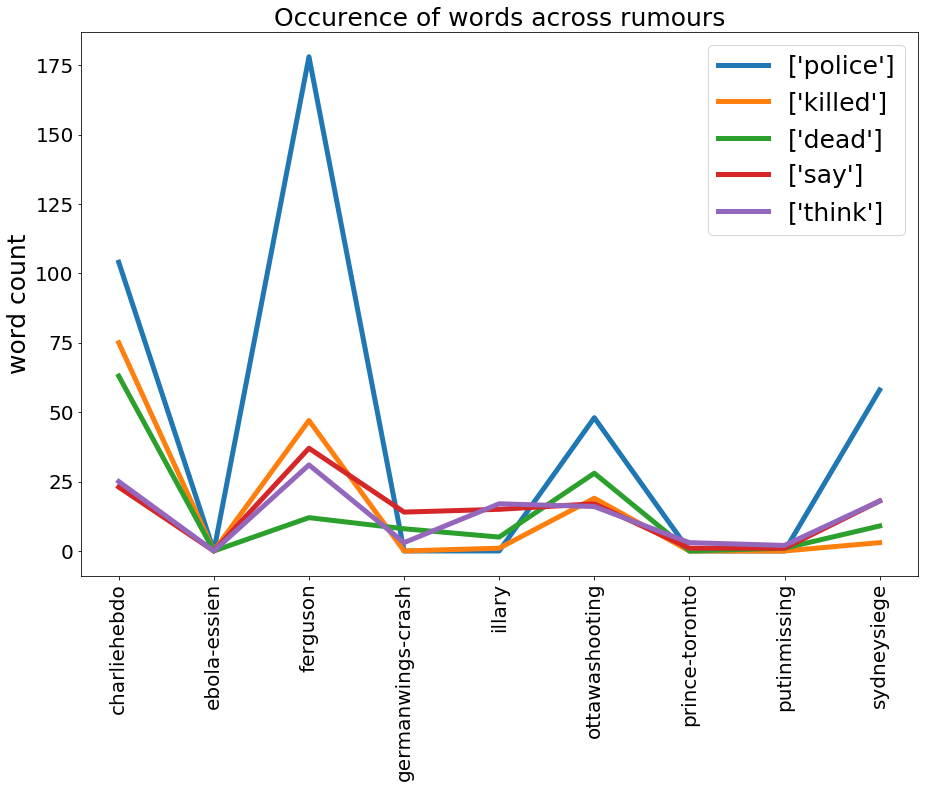

In [13]:
words = [np.argwhere(F == 'police')[0],
         np.argwhere(F == 'killed')[0],
         np.argwhere(F == 'dead')[0],
         np.argwhere(F == 'say')[0],
         np.argwhere(F == 'think')[0]]

nW = len(words)
nR = len(rumours)

C = np.zeros((nW, nR))

# Loop over words and rumours
for w, word in enumerate(words):
    for r, rumour in enumerate(rumours):

        # Rumour index
        rum_ix = (data['rumour'] == rumour).values

        # Take sum of words
        C[w, r] = np.sum(T[rum_ix, word], axis=0)
    
# Plot progression of word over rumours    
fig = plt.figure(figsize=(15,10))

for w, word in enumerate(words):
    plt.plot(rumours, C[w, :], label=F[word], linewidth=lW)

plt.xticks(rotation=90)
plt.ylabel('word count', fontsize=fS)
plt.legend(fontsize=fS)
plt.title('Occurence of words across rumours', fontsize=fS);
